In [3]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from IPython.display import display, Markdown
import seaborn as sns; sns.set_context('notebook')
import warnings
warnings.simplefilter("ignore")
az.style.use('arviz-darkgrid')
np.random.seed(44)


In [4]:
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams.update({
    "figure.figsize": [8, 4],
    'figure.constrained_layout.use': True,
    'font.size': 14.0,
    'hist.bins': 'auto',
    'lines.linewidth': 3.0,
    'lines.markeredgewidth': 2.0,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 8.0, 
})

# Multilevel tadpoles


Giorgio Corani <br/>
*Bayesian Data Analysis and Probabilistic Programming*
<br/>
<br/>
``giorgio.corani@supsi.ch``





# Multilevel tadpoles


<img src='img/tadpoles.jpg' width=400 align="center" >
(<a href= https://commons.wikimedia.org/w/index.php?curid=167359> Image from wikipedia</a>)






In [13]:
#Loading the data
data= pd.read_csv("data/tadpoles.csv")
data

,density,pred,size,surv,propsurv
0,10,no,big,9,0.900000
1,10,no,big,10,1.000000
2,10,no,big,7,0.700000
3,10,no,big,10,1.000000
4,10,no,small,9,0.900000
5,10,no,small,9,0.900000
6,10,no,small,10,1.000000
7,10,no,small,9,0.900000
8,10,pred,big,4,0.400000
9,10,pred,big,9,0.900000


# The response variable

*  *propsurv*: proportion of  survived tadpoles

It is computed as $\frac{\text{surv}}{\text{density}}$:

*  *surv*: number of tadpoles survived
* *density*: initial count of tadpoles.

   
* Each row is an experiment characterized by different conditions.

# Covariates: size

* The tank can be:

    * small (density: 10 tad poles)
    * medium (density:  25 tadpoles)
    * large  (density: 35 tadpoles)

# Covariates: accessible to predators

* The tank can be:

    * accessible to predators (*pred*)
    * inaccessible to predators (*no*)

# The data set

* Each row is an experiment characterized by different conditions.

* There are lots of things peculiar to each tank that go unmeasured, which create variation in survival across tanks, even when  the  variables have the same value.

* These tanks are an example of a cluster variable.  Repeated tadpoles experiments are carried out with tanks which have the same condition (i.e., which correspond to the same cluster).

# Pooled model 
* If we ignore the clusters, assigning the same intercept to each of them, we risk ignoring important variation in baseline survival. 

# Unpooled model 
* If we instead estimate a unique intercept for each cluster, using a dummy variable for each tank, we relearn from scratch the model of every tank. After all, tanks are different but each tank does help us estimate survival in the other tanks. So it doesn’t make sense to forget entirely, moving from one tank to another.

# Multilevel model
* We want a model, in which we simultaneously estimate both an intercept for each tank and the population of  tanks. 
* This will be a varying intercept model.

#  Unpooled survival model

\begin{align*}
s_i & ∼ \text{Binomial} (N_i, p_i)
\end{align*}

* Given the probability of survival $p_i$ in tank $i$, the number of survived tadpoles follows a binomial distribution.
* The number of trials is $N_i$, i.e., the density of tank $i$.

# descrizione logit da statistical rethinking, 10.2.2 (pag 340)

#  Unpooled survival model

\begin{align*}
log \frac{p_i}{1-p_i} & = logit (p_i)  = \alpha_i \\
s_i  & \sim Binomial (N_i, p_i) \\
\end{align*}

* The logit(p) varies over $-\infty, \infty$.
* To assign a prior to $p_i$ we shall thus assign a prior to $\alpha_i$.

#  Unpooled survival model

\begin{align*}
\alpha_i & \sim Normal(0, 1.5)\\
log \frac{p_i}{1-p_i} & = logit (p_i)  = \alpha_i \\
s_i  & \sim Binomial (N_i, p_i) \\
\end{align*}

* The logit(p) varies over $-\infty, \infty$.
* To assign a prior to $p_i$ we shall thus assign a prior to $\alpha_i$.
* We let $\alpha_i$ practically vary between $(-4.5, 4.5)$:
    *  $\alpha_i$=4.5 corresponds to....

#  Exercise

* Design the pooled model
* Design 

# Probabilistic unpooled model

We will fit, independently for each county,  the model: **REVISE**

\begin{align}
\beta x_i & \sim N (0,1)  && \text{prior on the slope for standardized data} \\
\alpha &\sim N(0,1) && \text{prior on the intercept for standardized data} \\
\sigma_{\epsilon} &\sim \text{HalfNormal}(0,1) && \text{prior on the noise dev std,  for standardized y} \\
y_i  &\sim N( \alpha + \beta x_i,  \sigma_{\epsilon}) && \text{likelihood}
\end{align}

# Discussion
Both approaches are extreme:

* pooling: we imply that all observations are samples from the same model,   ignoring any variation due to the county.
* unpooling: we imply that differences between counties are so large that each county needs its own model. We learn from scratch every model, without transferring any information between models.

# Complete pooling model (Bayesian)

In [9]:

with pm.Model() as pooled_model:
    #intercept is beta[0], slope is beta[1]. 
    #beta is a  vector of 2 parameters, as specified by  the shape parameter. 
    β = pm.Normal('β', 0, sigma=10, shape=2)
    σ = pm.HalfNormal('σ', 5)
    
    θ = β[0] + β[1]*floor_std
    
    y = pm.Normal('y', θ, sigma=σ, observed=log_radon_std)
    

In [10]:
with pooled_model:
    pooled_trace = pm.sample(return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, β]


/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


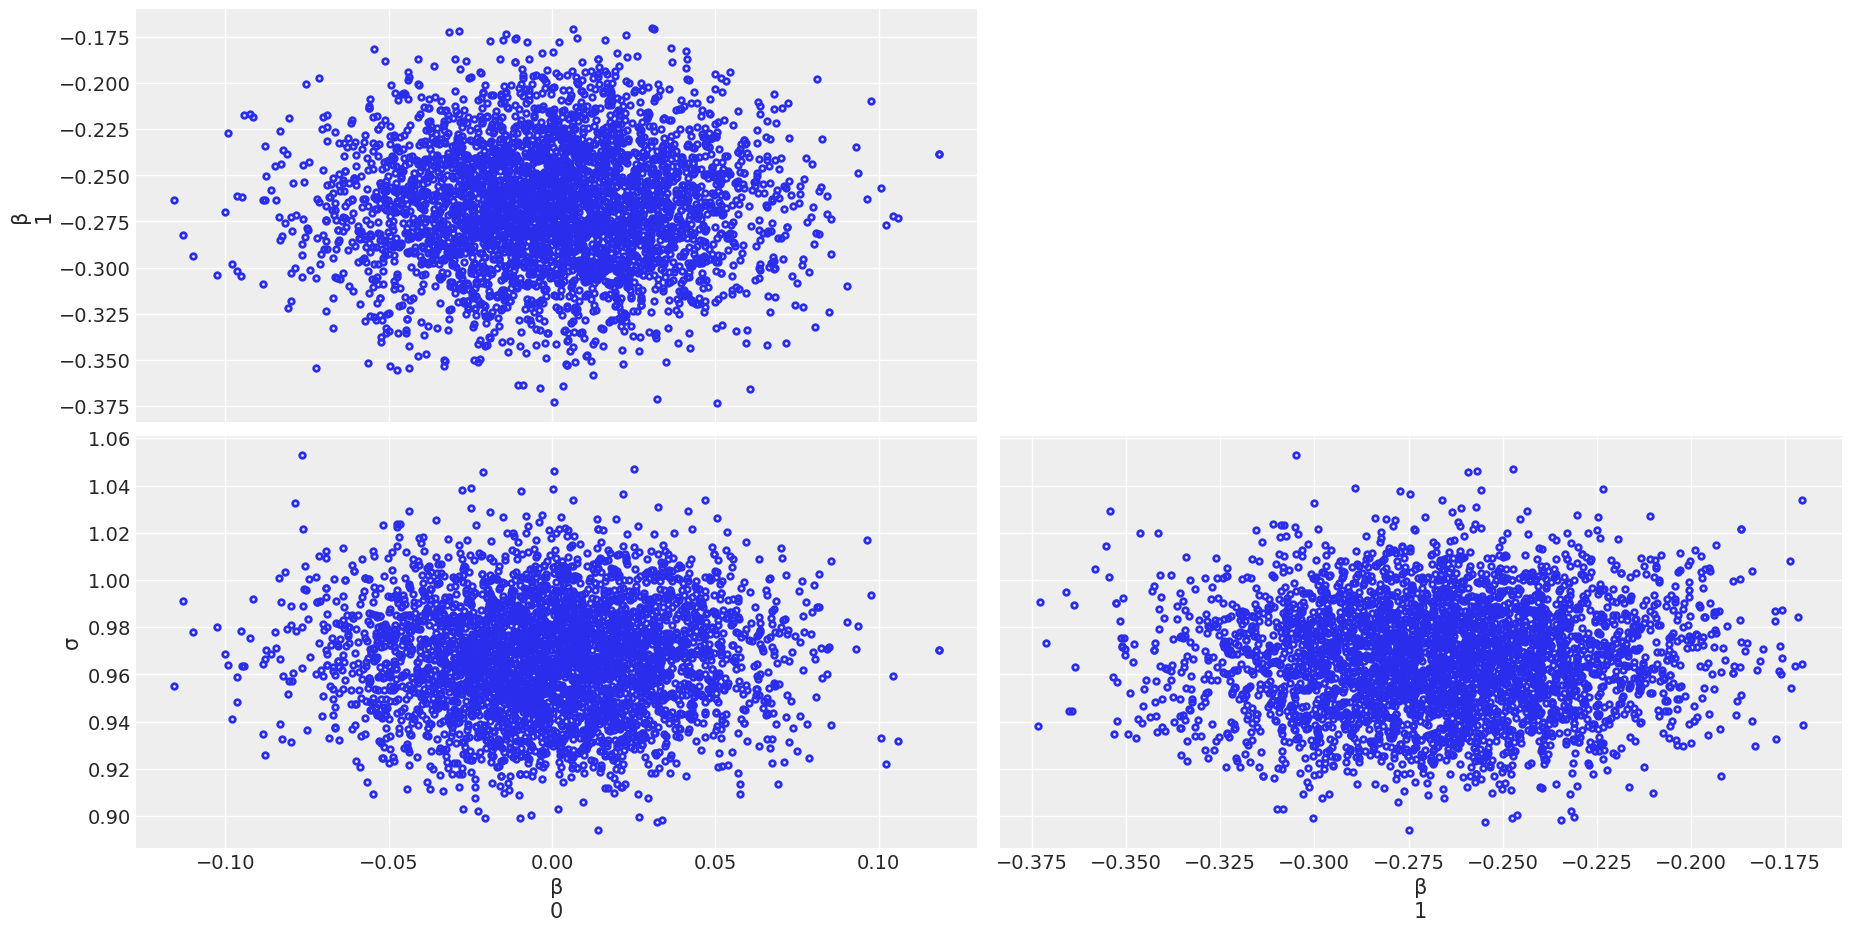

In [17]:
    #standardization of x removes correlation in the posterior.
with pooled_model:
        az.plot_pair(pooled_trace);

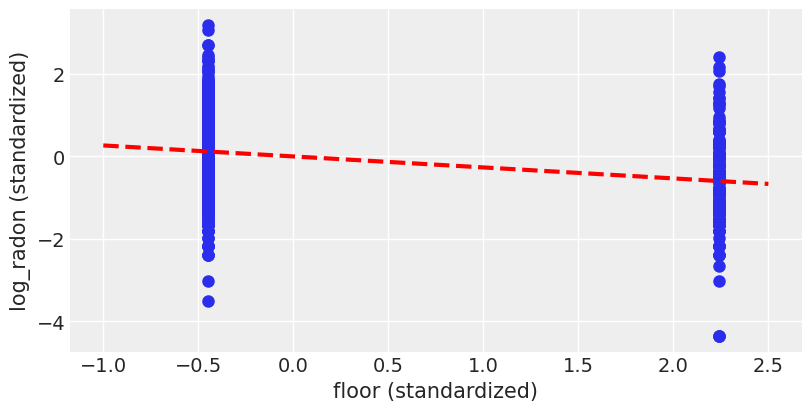

In [23]:
#plt.scatter(radon_data.floor, np.log(radon_data.activity+0.1))
plt.scatter(floor_std, log_radon_std)
xvals = np.linspace(-1, 2.5)
plt.plot(xvals, b0*xvals + a0, 'r--')
plt.xlabel('floor (standardized)')
plt.ylabel('log_radon (standardized)');

Estimates of county radon levels for the unpooled model:

---
# Credits

* Statistical Rethinking 2nd Edition, Richard McElreath